In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

In [4]:
df=pd.read_excel(r'Combined Sales.xlsx',parse_dates=['Month'], index_col=1)
df.drop(df.columns[[0, 1, 2, 3, 5]], axis=1,inplace=True)
df.rename(columns={'Fees Total':'sales'}, inplace=True)
df
sales_data=df['sales'].resample('MS').sum()
sales_data.head()

Month
2020-04-01    1294700.0
2020-05-01    2612334.0
2020-06-01    2396372.2
2020-07-01    2952571.0
2020-08-01    3909919.0
Freq: MS, Name: sales, dtype: float64

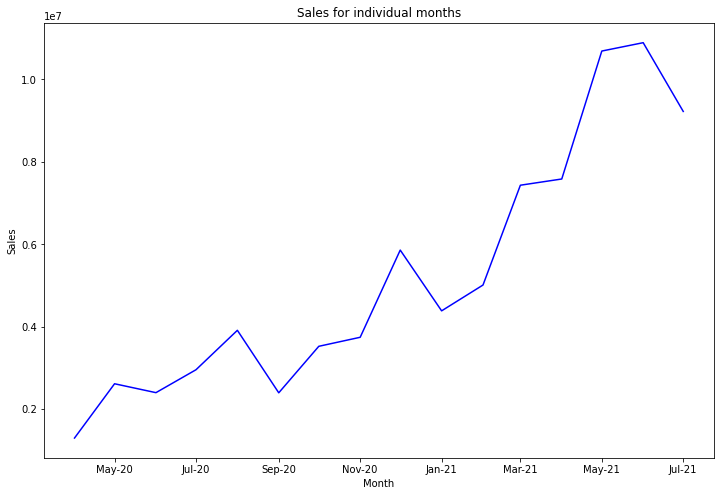

In [5]:
#Plot
fig, ax = plt.subplots(figsize = (12, 8))
fig = plt.plot(sales_data, color = "blue")
ax.set(xlabel="Month",
       ylabel="Sales",
       title="Sales for individual months")
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [6]:
#Testing whether data is stationary - 2 Methods
#For the data to be stationary the mean and std must be constant which is
#clearly not the case here
#Rolling Statistics
def RollingStatistics(Sales):
    rolmean = Sales.rolling(window = 3).mean()
    rolstd = Sales.rolling(window = 3).std()
    print("Mean & Standard Deviation: ")
    print(rolmean, rolstd, sep="\n")
    orig = plt.plot(Sales, color = 'blue', label='Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    dtFmt = DateFormatter('%b-%y')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.show(block = False)


Mean & Standard Deviation: 
Month
2020-04-01             NaN
2020-05-01             NaN
2020-06-01    2.101135e+06
2020-07-01    2.653759e+06
2020-08-01    3.086287e+06
2020-09-01    3.085067e+06
2020-10-01    3.274801e+06
2020-11-01    3.218423e+06
2020-12-01    4.373413e+06
2021-01-01    4.660362e+06
2021-02-01    5.083257e+06
2021-03-01    5.608261e+06
2021-04-01    6.675321e+06
2021-05-01    8.568901e+06
2021-06-01    9.722345e+06
2021-07-01    1.026901e+07
Freq: MS, Name: sales, dtype: float64
Month
2020-04-01             NaN
2020-05-01             NaN
2020-06-01    7.066919e+05
2020-07-01    2.804038e+05
2020-08-01    7.655822e+05
2020-09-01    7.672336e+05
2020-10-01    7.881801e+05
2020-11-01    7.234250e+05
2020-12-01    1.290068e+06
2021-01-01    1.085433e+06
2021-02-01    7.402923e+05
2021-03-01    1.610789e+06
2021-04-01    1.444645e+06
2021-05-01    1.838661e+06
2021-06-01    1.854806e+06
2021-07-01    9.108477e+05
Freq: MS, Name: sales, dtype: float64


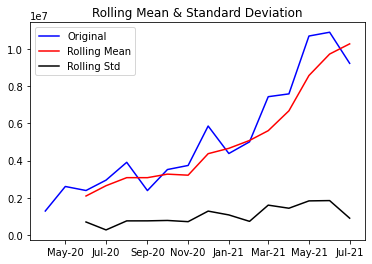

Mean & Standard Deviation: 
Month
2020-04-01            NaN
2020-05-01            NaN
2020-06-01    1434.047504
2020-07-01    1627.532784
2020-08-01    1747.892743
2020-09-01    1747.498268
2020-10-01    1800.276377
2020-11-01    1785.862929
2020-12-01    2077.004789
2021-01-01    2149.282051
2021-02-01    2250.639989
2021-03-01    2352.650601
2021-04-01    2572.783799
2021-05-01    2916.585077
2021-06-01    3107.972301
2021-07-01    3202.371885
Freq: MS, Name: sales, dtype: float64
Month
2020-04-01           NaN
2020-05-01           NaN
2020-06-01    258.775453
2020-07-01     85.698052
2020-08-01    216.188670
2020-09-01    216.736106
2020-10-01    225.186102
2020-11-01    208.986203
2020-12-01    298.657031
2021-01-01    247.835352
2021-02-01    163.752326
2021-03-01    331.577628
2021-04-01    290.098887
2021-05-01    306.020938
2021-06-01    307.049412
2021-07-01    143.986001
Freq: MS, Name: sales, dtype: float64


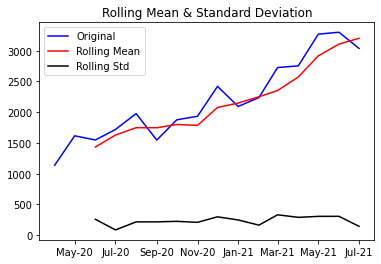

In [7]:
RollingStatistics(sales_data)
#Taking sqrt for larger Data Handling
sales_data_sqrt= np.sqrt(sales_data)
RollingStatistics(sales_data_sqrt)

In [8]:
#Since we have a data for only one year, we don't have any seasonality present
#as described by Standard deviation
#Trend component is primarily the reason for the non-stationarity of the data

#Augmented Dicky-Fuller test
#Null Hypothesis : Sales is not Stationary
#Alternate Hypothesis : Sales is Stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    print("Results of Dicky-Fuller Test")
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adfuller_test(sales_data)
adfuller_test(sales_data_sqrt)
sales_data_sqrt.head(10)

Results of Dicky-Fuller Test
ADF Test Statistic : 82.17317001935
p-value : 1.0
#Lags Used : 6
Number of Observations Used : 9
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Results of Dicky-Fuller Test
ADF Test Statistic : 3.7662202651681578
p-value : 1.0
#Lags Used : 6
Number of Observations Used : 9
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Month
2020-04-01    1137.848848
2020-05-01    1616.271636
2020-06-01    1548.022028
2020-07-01    1718.304688
2020-08-01    1977.351511
2020-09-01    1546.838604
2020-10-01    1876.639017
2020-11-01    1934.111165
2020-12-01    2420.264186
2021-01-01    2093.470802
Freq: MS, Name: sales, dtype: float64

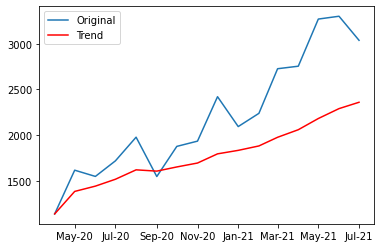

In [10]:
#Trend 
exponentialDecayWeightedAverage = sales_data_sqrt.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(sales_data_sqrt)
plt.plot(exponentialDecayWeightedAverage, color = 'red')
dtFmt = DateFormatter('%b-%y')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.legend(['Original', 'Trend'])
plt.show(block = False)

Results of Dicky-Fuller Test
ADF Test Statistic : -5.5521831527413354
p-value : 1.610511430610773e-06
#Lags Used : 0
Number of Observations Used : 14
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Mean & Standard Deviation: 
Month
2020-05-01           NaN
2020-06-01           NaN
2020-07-01    193.485280
2020-08-01    120.359959
2020-09-01     -0.394475
2020-10-01     52.778110
2020-11-01    -14.413449
2020-12-01    291.141861
2021-01-01     72.277262
2021-02-01    101.357938
2021-03-01    102.010612
2021-04-01    220.133198
2021-05-01    343.801278
2021-06-01    191.387224
2021-07-01     94.399583
Freq: MS, Name: sales, dtype: float64
Month
2020-05-01           NaN
2020-06-01           NaN
2020-07-01    274.073801
2020-08-01    169.262948
2020-09-01    375.128203
2020-10-01    420.034728
2020-11-01    385.220379
2020-12-01    216.939359
2021-01-01    406.675371
2021-02-01    408.203732
2021-03-01    409.127122
2021-

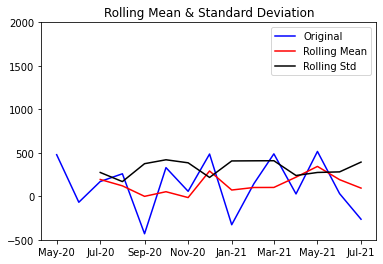

In [11]:
#Differencing
sales_data_sqrt_diff = sales_data_sqrt - sales_data_sqrt.shift(1)
adfuller_test(sales_data_sqrt_diff.dropna())
plt.ylim(-500, 2000) #To set to original range of earlier plot Sales
RollingStatistics(sales_data_sqrt_diff.dropna())
#The null Hypothesis is Rejected and Now we have stationary Data at our hand
#Now we can move on with actual Modelling

Mean & Standard Deviation: 
Month
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          NaN
2020-07-01    25.758866
2020-08-01    22.711073
2020-09-01    -5.815611
2020-10-01     9.320354
2020-11-01   -68.911292
2020-12-01    47.238614
2021-01-01     0.207367
2021-02-01    -7.640704
2021-03-01   -22.053111
2021-04-01   -38.394556
2021-05-01    45.581049
2021-06-01    16.769375
2021-07-01          NaN
Freq: MS, Name: resid, dtype: float64
Month
2020-04-01           NaN
2020-05-01           NaN
2020-06-01           NaN
2020-07-01    122.591415
2020-08-01    117.632169
2020-09-01    158.888141
2020-10-01    161.888163
2020-11-01    107.524709
2020-12-01    132.777935
2021-01-01    156.492858
2021-02-01    163.324076
2021-03-01    138.383819
2021-04-01    153.457366
2021-05-01    164.615895
2021-06-01    147.098410
2021-07-01           NaN
Freq: MS, Name: resid, dtype: float64


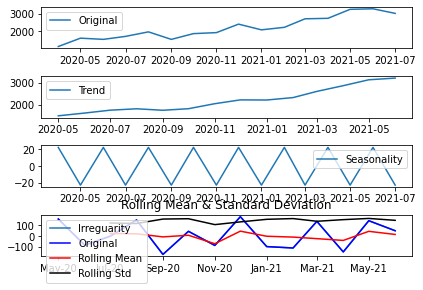

In [14]:
#Components of Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_data_sqrt.dropna(), period = 2)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
ax1 = plt.plot(sales_data_sqrt, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
ax2 = plt.plot(trend, label = "Trend")
plt.legend(loc = 'best')
plt.subplot(413)
ax3 =plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
ax4 = plt.plot(residual, label = 'Irreguarity')
plt.legend(loc = 'best')
plt.tight_layout()

RollingStatistics(residual)

Mean & Standard Deviation: 
Month
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          NaN
2020-07-01    25.758866
2020-08-01    22.711073
2020-09-01    -5.815611
2020-10-01     9.320354
2020-11-01   -68.911292
2020-12-01    47.238614
2021-01-01     0.207367
2021-02-01    -7.640704
2021-03-01   -22.053111
2021-04-01   -38.394556
2021-05-01    45.581049
2021-06-01    16.769375
2021-07-01          NaN
Freq: MS, Name: resid, dtype: float64
Month
2020-04-01           NaN
2020-05-01           NaN
2020-06-01           NaN
2020-07-01    122.591415
2020-08-01    117.632169
2020-09-01    158.888141
2020-10-01    161.888163
2020-11-01    107.524709
2020-12-01    132.777935
2021-01-01    156.492858
2021-02-01    163.324076
2021-03-01    138.383819
2021-04-01    153.457366
2021-05-01    164.615895
2021-06-01    147.098410
2021-07-01           NaN
Freq: MS, Name: resid, dtype: float64


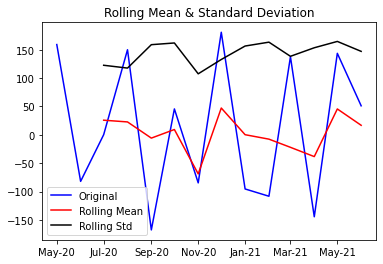

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

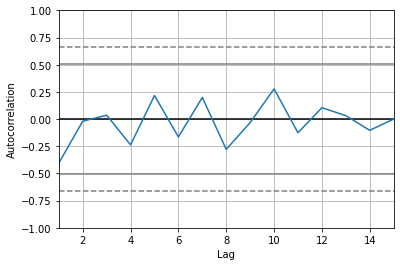

In [15]:
#Auto Regrssive Model
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(sales_data_sqrt_diff.dropna())

C:\Users\MRITYUNJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


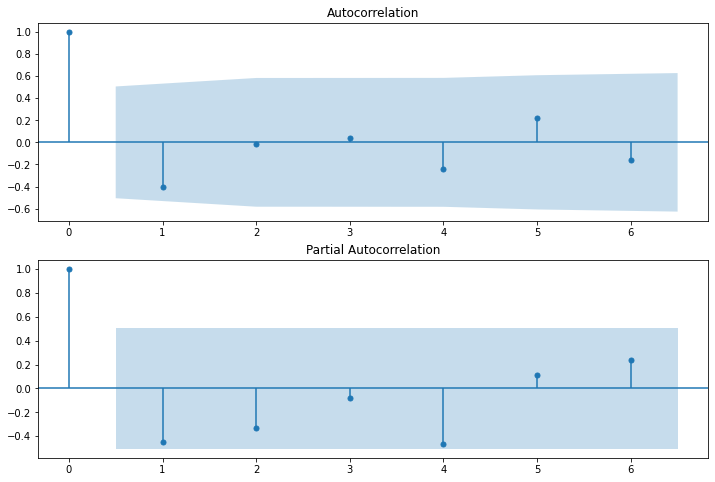

In [16]:
#ACF And PACF plots
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_data_sqrt_diff.dropna(), lags = 6, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_data_sqrt_diff.dropna(), lags = 6, ax = ax2, method = "ols")
fig.show()
#Hence p = 0

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#From earlier p=0, d=1, q=4
#Using ARIMA Model for Forecasting
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sales_data_sqrt ,order =(0, 1, 4))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   15
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -103.379
Method:                       css-mle   S.D. of innovations            220.199
Date:                Sat, 31 Jul 2021   AIC                            218.758
Time:                        19:16:57   BIC                            223.006
Sample:                    05-01-2020   HQIC                           218.713
                         - 07-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           130.1501     14.665      8.875      0.000     101.407     158.894
ma.L1.D.sales    -0.8422      0.379     -2.221      0.026      -1.585      -0.099
ma.L2.D.sales    -0.1042      0.563     -0.185      0.853      -1.208       1.000
ma.L3.D.sales     0.0261      0.715      0.037      0.971      -1.376       1.428
ma.L4.D.sales    -0.0797      0.419     -0.190      0.849      -0.901       0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -2.2571           -0.0000j            2.2571           -0.5000
MA.3            0.7924           -2.2200j            2.3572           -0.1954
MA.4            0.7924           +2.2200j            2.3572            0.1954
-----------------------------------------------------------------------------
"""

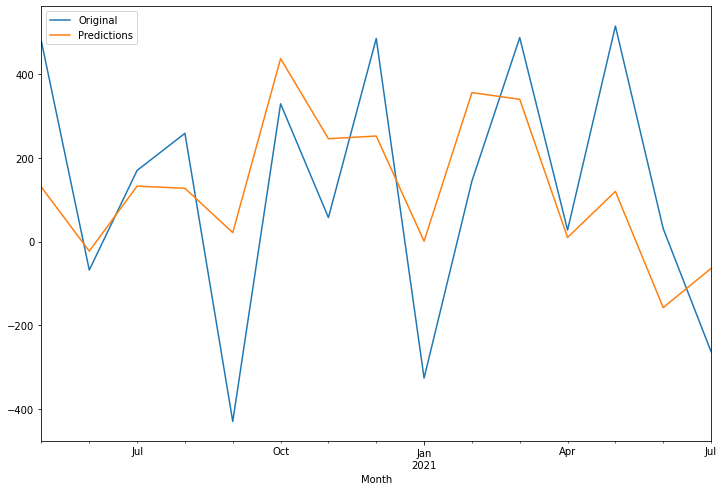

In [19]:
sales_data_sqrt_diff_forecast = result.predict()
sales_data_sqrt_diff.dropna().plot(figsize = (12, 8))
sales_data_sqrt_diff_forecast.plot(figsize=(12, 8))
plt.legend(["Original", "Predictions"])

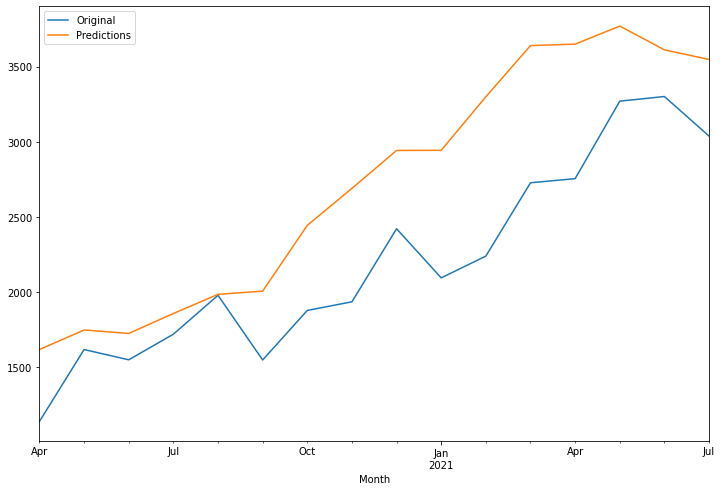

In [20]:
sales_data_sqrt_diff_forecast_cumsum =sales_data_sqrt_diff_forecast.cumsum()
predictions_ARIMA_sqrt = pd.Series(sales_data_sqrt.iloc[1], index = sales_data_sqrt.index)
predictions_ARIMA_sqrt = predictions_ARIMA_sqrt.add(sales_data_sqrt_diff_forecast_cumsum, fill_value = 0)
sales_data_sqrt.plot(figsize = (12, 8), legend = True)
predictions_ARIMA_sqrt.plot(figsize = (12, 8), legend = True)
plt.legend(["Original", "Predictions"])

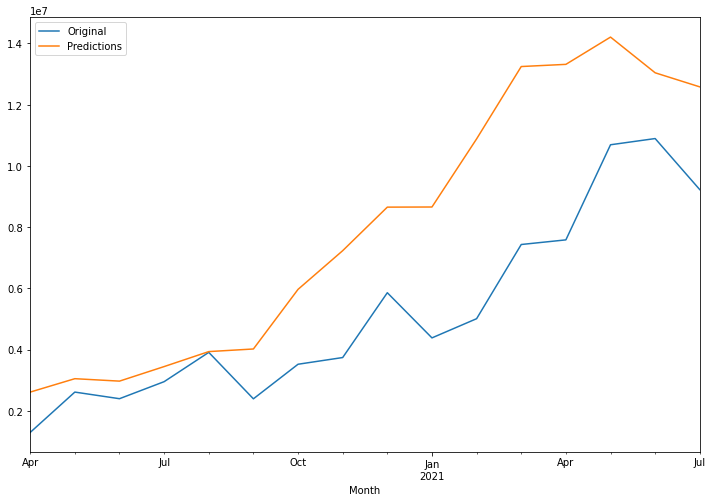

In [21]:
final_predictions = predictions_ARIMA_sqrt**2
sales_data.plot(figsize = (12, 8), legend = True)
final_predictions.plot(figsize = (12, 8), legend = True)
plt.legend(["Original", "Predictions"])

In [25]:
#Forecasting
model = ARIMA(sales_data ,order =(0, 1, 4))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   15
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -230.940
Method:                       css-mle   S.D. of innovations        1103194.118
Date:                Sat, 31 Jul 2021   AIC                            473.881
Time:                        19:20:56   BIC                            478.129
Sample:                    05-01-2020   HQIC                           473.836
                         - 07-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.286e+05   1.42e+05      3.711      0.000    2.49e+05    8.08e+05
ma.L1.D.sales    -0.4473      0.438     -1.021      0.307      -1.306       0.411
ma.L2.D.sales    -0.2292      0.398     -0.575      0.565      -1.010       0.551
ma.L3.D.sales    -0.0009      0.405     -0.002      0.998      -0.795       0.793
ma.L4.D.sales    -0.3227      0.359     -0.898      0.369      -1.027       0.382
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -1.3835           -0.0000j            1.3835           -0.5000
MA.3            0.1904           -1.4844j            1.4965           -0.2297
MA.4            0.1904           +1.4844j            1.4965            0.2297
-----------------------------------------------------------------------------
"""

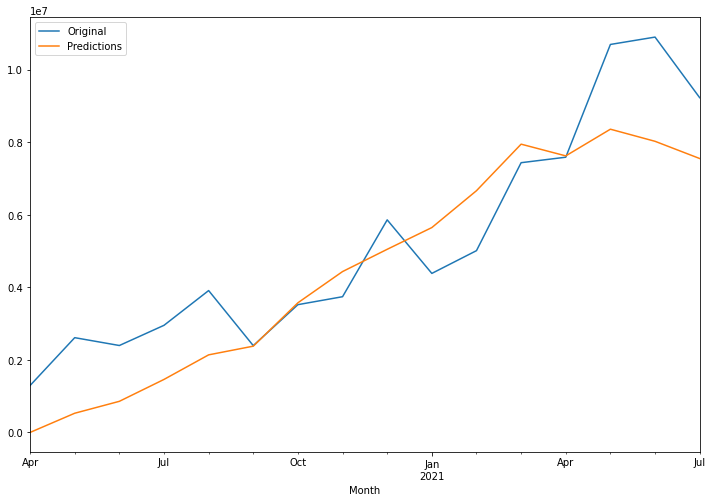

In [26]:
diff = result.predict()
sales_data_diff_forecast_cumsum =diff.cumsum()
predictions_ARIMA = pd.Series(sales_data.iloc[1], index = sales_data.index)
predictions_ARIMA = predictions_ARIMA_sqrt.add(sales_data_diff_forecast_cumsum, fill_value = 0)
sales_data.plot(figsize = (12, 8), legend = True)
predictions_ARIMA.plot(figsize = (12, 8), legend = True)
plt.legend(["Original", "Predictions"])

In [30]:
x = result.forecast(steps = 12)

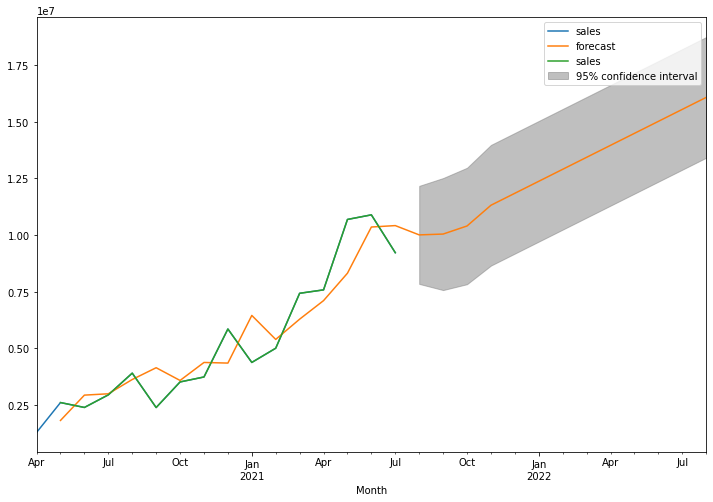

In [47]:
fig, ax = plt.subplots()
ax = sales_data.plot(ax=ax, figsize = (12, 8))
fig = result.plot_predict(1, len(sales_data)+12, ax = ax)